In [12]:
import pandas as pd
import numpy as np
import argparse
import glob

# Possibilita a passagem de argumentos pelo terminal
# parser = argparse.ArgumentParser(description='PES post-processing')
# parser.add_argument('file')
# parser.add_argument('number_states')

# args = parser.parse_args()
# FILE = args.file
# NUMBER_STATES=int(args.number_states)

FILE = "/home/mariana/Documents/01-Em.andamento/08-BoostCrop/04-Molecules/36-DPP/08-LIIC.OPTS1.CI/02-DPP-w.lateral.groups/pes_energies"
NUMBER_STATES = 2
au2ev = 27.211

RAW_DATA_df = pd.read_csv(FILE, header=None, sep=" ")
# RAW_DATA_df = RAW_DATA_df

## PES
# Conversion au to eV
RAW_DATA_df = RAW_DATA_df.apply(lambda x: x*au2ev if x.name == 0 else x, axis=1)

#  Absolute energy value (in eV)
ABS_ENERGIES = RAW_DATA_df + RAW_DATA_df.loc[0].values.squeeze()
ABS_ENERGIES.loc[0] = RAW_DATA_df.loc[0]
print(ABS_ENERGIES)

# Normalized plot
S0_MIN = np.amin(ABS_ENERGIES.values[0])
NORM_ENERGIES = ABS_ENERGIES - S0_MIN
MAX_ENERGY = np.amax(NORM_ENERGIES.values[NUMBER_STATES])

# x values
x=[i for i in range(NORM_ENERGIES.shape[1])] 

#print(S0_MIN)
# print (MAX_ENERGY)
# print(NORM_ENERGIES)
-93114.767873 --93122.77977

             0             1             2             3             4   \
0  -93122.77977 -93122.556968 -93122.052282 -93121.372466 -93120.579693   
1  -93120.82117 -93120.629568 -93120.151682 -93119.493166 -93118.716193   
2  -93120.30257 -93120.090368 -93119.595082 -93118.921866 -93118.173693   
3  -93119.51867 -93119.335468 -93118.880082 -93118.281666 -93118.131393   
4  -93119.49227 -93119.296668 -93118.817082 -93118.234966 -93117.522293   
5  -93119.16917 -93118.966068 -93118.481282 -93118.149366 -93117.386093   
6  -93119.16737 -93118.942768 -93118.436582 -93117.819366 -93117.044193   
7  -93119.04447 -93118.866268 -93118.409082 -93117.779166 -93117.031893   
8  -93118.75347 -93118.562168 -93118.141882 -93117.751266 -93116.955493   
9  -93118.74417 -93118.540468 -93118.100982 -93117.470466 -93116.728893   
10 -93118.74417 -93118.517868 -93118.056482 -93117.400466 -93116.632793   

              5             6            7             8             9   \
0  -93119.714261 -93118.

8.011896999989403

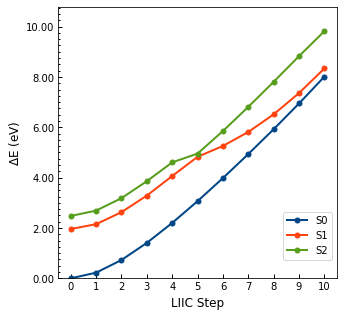

In [9]:
## PLOT 

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manage
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams

fig , ax = plt.subplots()

# Parametros dos eixos
#limite dos eixos: estabelece MAX_Y para maior valor de y e MAX_X para o maior valor de x do input fornecido

MAX_Y = MAX_ENERGY + 0.1*MAX_ENERGY
MIN_Y = 0
# MAX_X = int(len(list(df[:0]))) - 1

# # ax.set_xlim(left=0,right=MAX_X)
# ax.set_ylim(bottom=MIN_Y,top=MAX_Y)
ax.set_ylim(top=MAX_Y)

# # numero de casas decimais 
# #ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

#linhas delimitando area de plotagem
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# #ticks de cada um dos eixos
ax.xaxis.set_tick_params(top=False, direction='out', width=1)
ax.xaxis.set_tick_params(bottom=True, direction='in', width=1)
ax.yaxis.set_tick_params(right=False, direction='in', width=1)
ax.yaxis.set_tick_params(bottom=True, direction='in', width=1)

# #formatacao dos ticks dos eixos
plt.rc('font', family='sans-serif')
plt.tick_params(axis='y',bottom=True,which='minor',length=2,width=1, direction='in')
plt.tick_params(axis='y',bottom=True,which='major',length=4,width=1, direction='in')
plt.tick_params(axis='x',bottom=True,length=4,width=1)

step = 0.25
ticky = np.arange(MIN_Y, MAX_Y, step)
ax.set_yticks(ticky, minor=True)
plt.tick_params(axis='y',right=False,which='minor')

#tamanho do incremento no eixo
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))

#numero de casas decimais no eixo y
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

# #titulo dos eixos
ax.set_ylabel(r'$\Delta$E (eV)', fontsize=12)
#ax.set_xlabel('d ('r'$\AA$'')', fontsize=12)
ax.set_xlabel('LIIC Step', fontsize=12)

# tamanho do grafico
width=5.0
height = 5.0
fig.set_size_inches(width, height)

#posicao da legenda
box = ax.get_position()

f = 0
colors = ["#004586", "#ff420e" , "#579d1c" , "#7e0021", "#ff6d00" , "#46bdc6", "#ffd320"]
while (f<= NUMBER_STATES):
    plt.plot(x, NORM_ENERGIES.iloc[f], marker='o', label='S'+str(f), color=colors[f], linewidth=2.0, markersize=5)

    #legenda ao lado do grafico
    ax.legend(loc='lower right', bbox_to_anchor=(1.00, 0.05), frameon=None)
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
    f +=1

#fig.savefig('CEP-'+str(EXCITED_STATES)+'states.png', dpi=600, transparent=True)
fig.savefig(FILE+'.png', dpi=300, transparent=True)